### Step 1: Import Libraries

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Step 2: Load the Dataset

In [18]:
# Load dataset 
df = pd.read_csv("HR.csv")

# View first few rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Step 3: Explore and Clean Data

In [3]:
# Shape and info
print(df.shape)
df.info()

# Check missing values
print(df.isnull().sum().sum())  # Expect 0

# Drop redundant or constant columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=drop_cols, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


### Step 4: Exploratory Data Analysis (EDA)

C:\Users\DIYA\AppData\Local\Temp\ipykernel_4404\1666388654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


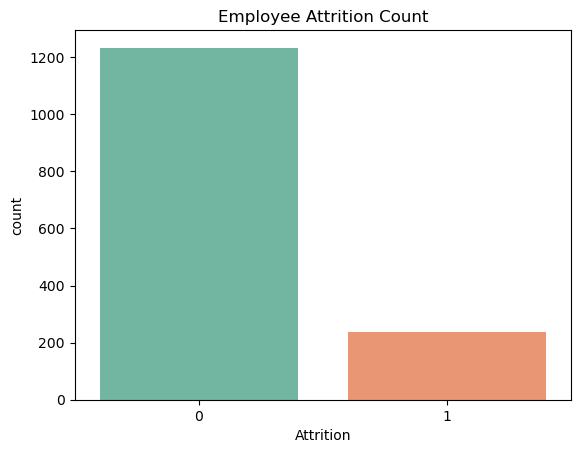

In [15]:
#Attrition distribution
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Employee Attrition Count')
plt.show()

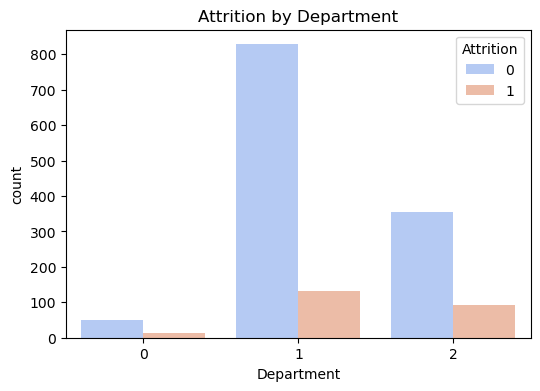

In [16]:
# Attrition by Department
plt.figure(figsize=(6,4))
sns.countplot(x='Department', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition by Department')
plt.show()

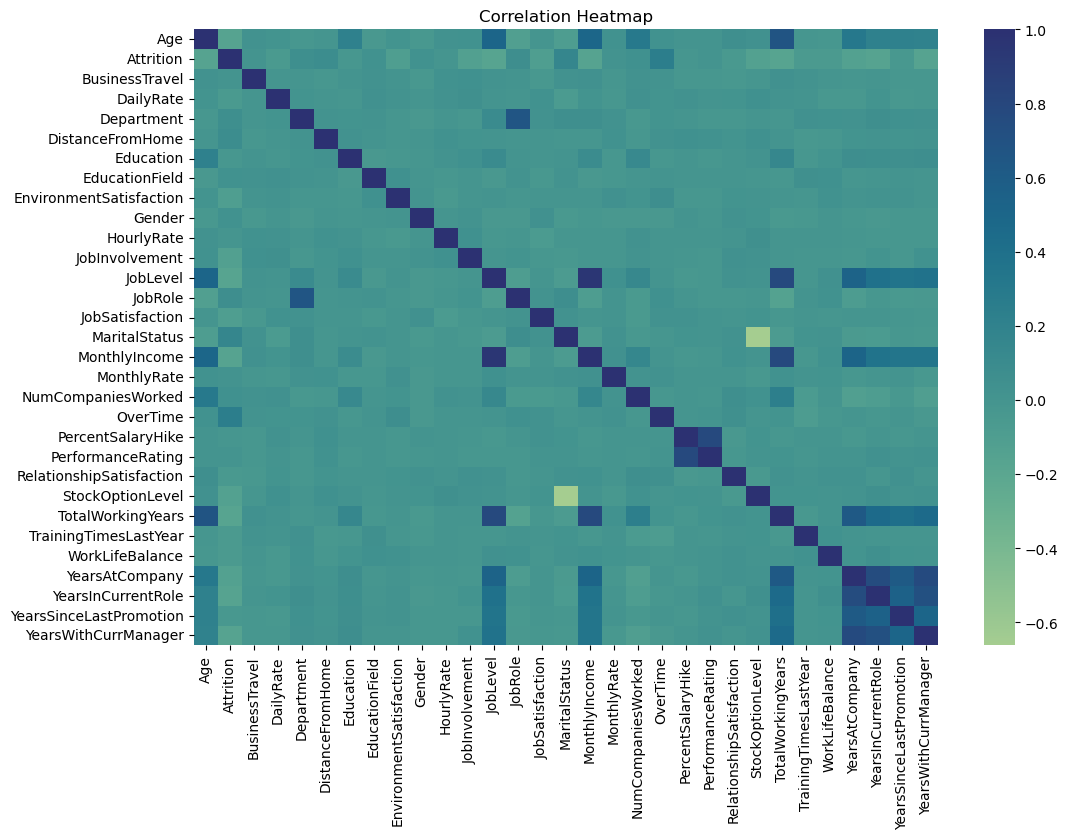

In [17]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

### Step 5: Feature Selection and Split

In [8]:
# Define X (features) and y (target)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Step 6: Feature Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 7: Model Building – Random Forest

In [10]:
# Create and train model
rf_model = RandomForestClassifier(
    n_estimators=150, random_state=42, max_depth=10, criterion='gini'
)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 84.01 %

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.50      0.15      0.23        47

    accuracy                           0.84       294
   macro avg       0.68      0.56      0.57       294
weighted avg       0.80      0.84      0.80       294



### Step 8: Confusion Matrix

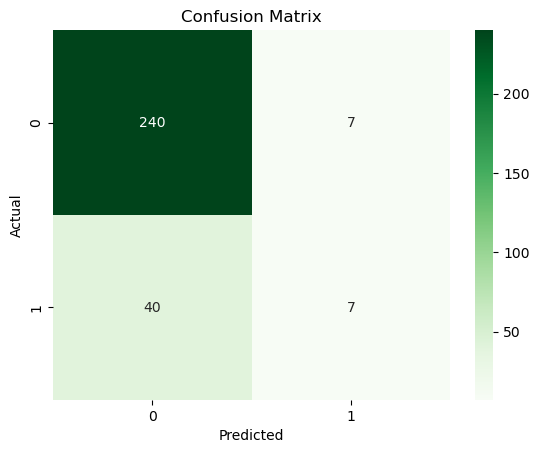

In [11]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Step 9: Feature Importance

C:\Users\DIYA\AppData\Local\Temp\ipykernel_4404\1936138819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='Blues_r')


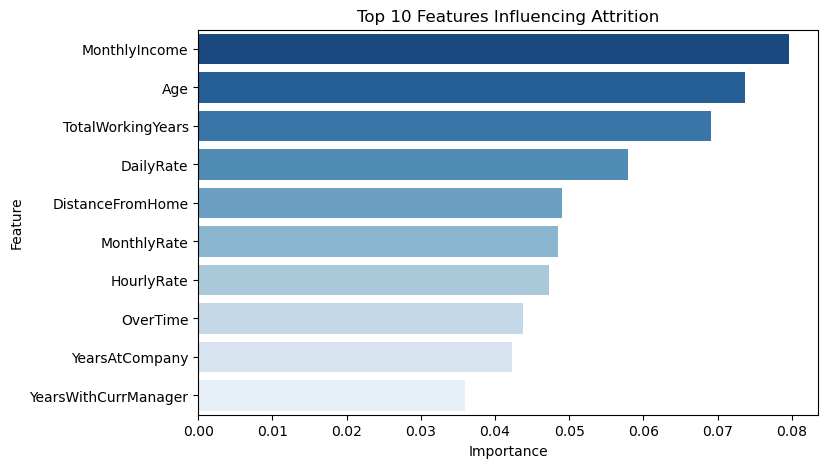

MonthlyIncome           0.079588
Age                     0.073715
TotalWorkingYears       0.069142
DailyRate               0.057947
DistanceFromHome        0.049059
MonthlyRate             0.048549
HourlyRate              0.047317
OverTime                0.043826
YearsAtCompany          0.042279
YearsWithCurrManager    0.035899
dtype: float64


In [12]:
# Get top 10 features influencing attrition
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top10.values, y=top10.index, palette='Blues_r')
plt.title('Top 10 Features Influencing Attrition')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(top10)

### Step 10: Example Insight Extraction

In [13]:
# Group by key features to extract simple insights
insight = df.groupby('OverTime')['Attrition'].mean()*100
print("Attrition rate for employees working overtime:\n", insight)

insight2 = df.groupby('JobSatisfaction')['Attrition'].mean()*100
print("\nAttrition rate by Job Satisfaction:\n", insight2)

Attrition rate for employees working overtime:
 OverTime
0    10.436433
1    30.528846
Name: Attrition, dtype: float64

Attrition rate by Job Satisfaction:
 JobSatisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Attrition, dtype: float64


### Step 11: Final Summary Output

In [14]:
print("✅ Model completed successfully!")
print(f"Final Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Top features influencing attrition include:", list(top10.index))

✅ Model completed successfully!
Final Accuracy: 84.01%
Top features influencing attrition include: ['MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'DistanceFromHome', 'MonthlyRate', 'HourlyRate', 'OverTime', 'YearsAtCompany', 'YearsWithCurrManager']
